# Testing on 'custom' dataset

In [1]:
import pandas as pd
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

import joblib

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/spencer/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/spencer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('../data/full_dataset.csv')

df = df[['text', 'sentiment']]
df.head()

,text,sentiment
0,Wonderful. Thank you. Keep up the great work!,positive
1,You chose the wrong wire. You need to install ...,negative
2,I would like you to install the yellow wire.,neutral
3,The yellow wire.,neutral
4,No. that is not correct. Install the brown wire.,negative


In [4]:
df['text'] = df['text'].str.lower()

In [5]:
X = df['text']
y = df['sentiment']


In [6]:
# Load the saved model
loaded_model = joblib.load('svc_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Vectorize
X_new = loaded_vectorizer.transform(X)
predictions = loaded_model.predict(X_new)

In [7]:
print("Classification Report:")
print(classification_report(y, predictions))
print("Accuracy Score:", accuracy_score(y, predictions))

Classification Report:
              precision    recall  f1-score   support

    negative       0.57      0.37      0.45       100
     neutral       0.51      0.72      0.60       100
    positive       1.00      0.95      0.97       100

    accuracy                           0.68       300
   macro avg       0.69      0.68      0.67       300
weighted avg       0.69      0.68      0.67       300

Accuracy Score: 0.68


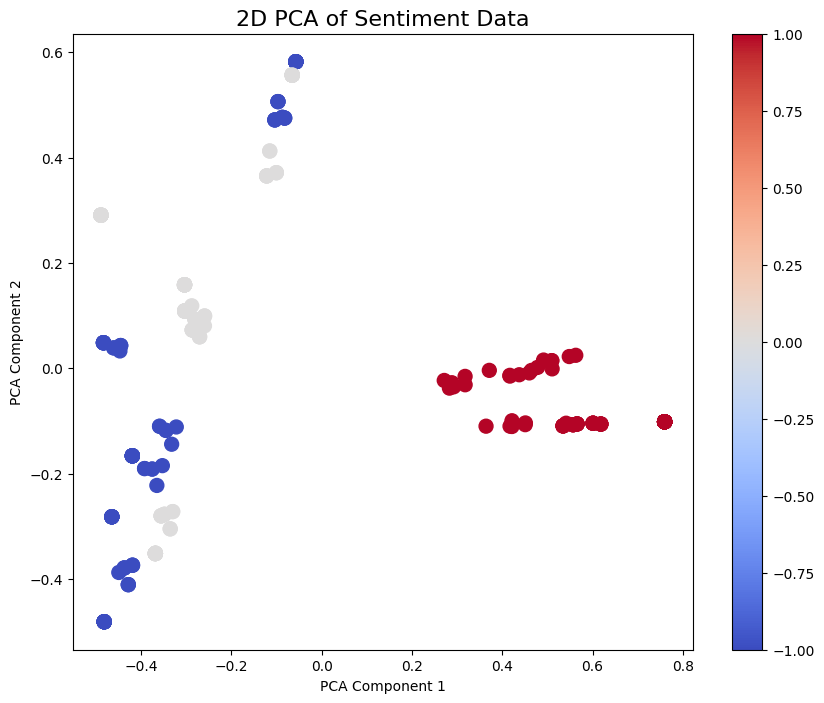

In [9]:
# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_new)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1}), cmap='coolwarm', s=100)

# Add labels
plt.title('2D PCA of Sentiment Data', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Display the plot
plt.colorbar()
plt.savefig('PCA.jpg')
plt.show()